In [280]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas import set_option
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from numpy import set_printoptions
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
#original (have to downgrade sklearns package to use): from sklearn.externals.six import StringIO 
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
#import pydotplus
from sklearn import tree
#import graphviz

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.ensemble import AdaBoostClassifier

import warnings

from sklearn.kernel_ridge import KernelRidge

warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [138]:
file_name = 'Titanic train.csv'
df = read_csv(file_name)

In [139]:
def load_dataset(file_name):
    """
    Loads a dataset from a given file path.
    """
    return pd.read_csv(file_name)

def find_text_columns(df):
    """
    Identifies text columns in a DataFrame.
    Returns a list of column names that contain text.
    """
    # This is a simple heuristic; you might need a more sophisticated approach depending on your data
    text_columns = [col for col in df.columns if df[col].dtype == object]
    return text_columns

def convert_categorical_to_numeric(df, columns):
    """
    Converts specified categorical columns in a DataFrame to numerical values.
    Uses LabelEncoder to transform each unique category in the columns to a number.
    """
    le = LabelEncoder()
    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df

# Columns to convert to numeric
columns_to_convert = ['Sex', 'Ticket', 'Fare', 'Cabin']

# Convert specified columns to numeric
df_numerical = convert_categorical_to_numeric(df, columns_to_convert)

# Display the first few rows of the DataFrame after conversion
print(df_numerical.head())
    
df_numerical

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

   Ticket  Fare  Cabin Embarked  
0     523    18    147        S  
1     596   207     81        C  
2     669    41    147        S  
3      49   189     55        S  
4     472    43    147        S  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,18,147,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,207,81,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,41,147,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,189,55,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,43,147,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,101,85,147,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,14,153,30,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,675,131,147,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,8,153,60,C


In [140]:
df = df_numerical
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,18,147,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,207,81,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,41,147,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,189,55,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,43,147,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,101,85,147,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,14,153,30,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,675,131,147,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,8,153,60,C


In [141]:
df.drop("Name", axis=1, inplace=True)
df.drop("Embarked", axis=1, inplace=True)
df.drop("PassengerId", axis=1, inplace=True)
df = df.dropna()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,0,3,1,22.0,1,0,523,18,147
1,1,1,0,38.0,1,0,596,207,81
2,1,3,0,26.0,0,0,669,41,147
3,1,1,0,35.0,1,0,49,189,55
4,0,3,1,35.0,0,0,472,43,147
...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,480,151,147
886,0,2,1,27.0,0,0,101,85,147
887,1,1,0,19.0,0,0,14,153,30
889,1,1,1,26.0,0,0,8,153,60


In [143]:
X = df.drop(df.columns[0], axis = 1)
Y = df['Survived']

In [144]:
dataFrame = pd.DataFrame(X)
dataFrame

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,3,1,22.0,1,0,523,18,147
1,1,0,38.0,1,0,596,207,81
2,3,0,26.0,0,0,669,41,147
3,1,0,35.0,1,0,49,189,55
4,3,1,35.0,0,0,472,43,147
...,...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,480,151,147
886,2,1,27.0,0,0,101,85,147
887,1,0,19.0,0,0,14,153,30
889,1,1,26.0,0,0,8,153,60


In [145]:
dataFrame.describe()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,2.236695,0.634454,29.699118,0.512605,0.431373,335.406162,111.240896,128.764706
std,0.838250,0.481921,14.526497,0.929783,0.853289,203.457651,69.521875,37.548444
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,20.125000,0.000000,0.000000,152.250000,43.000000,144.000000
50%,2.000000,1.000000,28.000000,0.000000,0.000000,331.000000,104.000000,147.000000
75%,3.000000,1.000000,38.000000,1.000000,1.000000,530.750000,162.750000,147.000000
max,3.000000,1.000000,80.000000,5.000000,6.000000,680.000000,247.000000,147.000000


array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Ticket'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Cabin'}>, <Axes: >]], dtype=object)

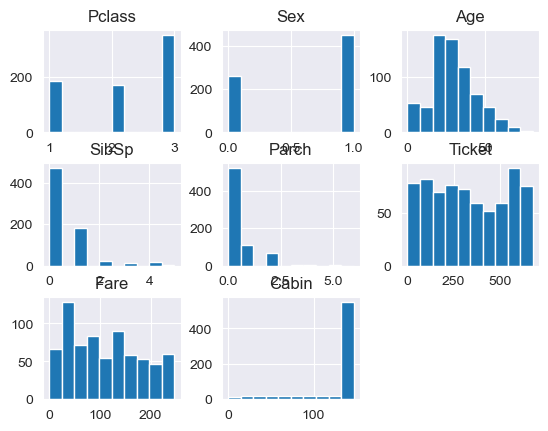

In [146]:
dataFrame.hist()

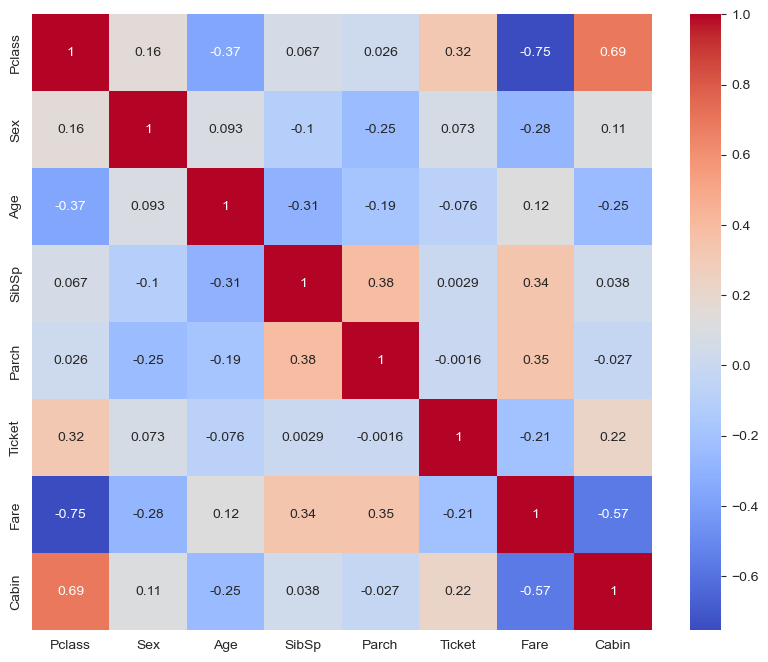

In [147]:
correlation_matrix = dataFrame.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

TypeError: scatter_matrix() missing 1 required positional argument: 'frame'

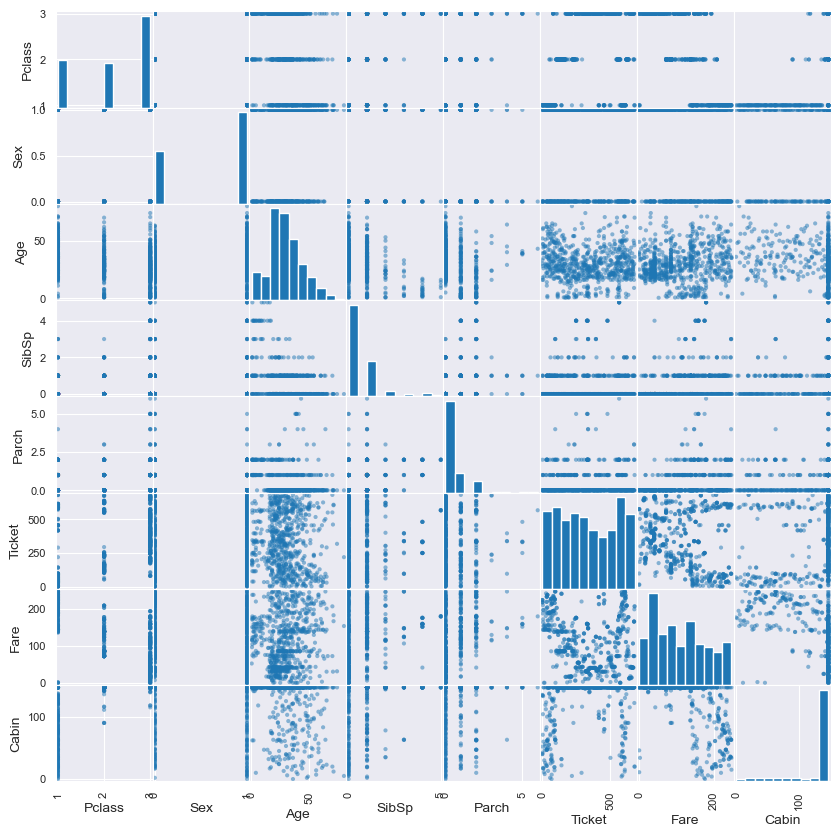

In [148]:
scatter_matrix(frame=dataFrame, alpha=0.5, figsize=(10,10), diagonal="hist")
scatter_matrix()

In [149]:
#Pre-processing 
#Testing if normalization works better on the data than standardization
scaler1 = Normalizer().fit(dataFrame)
normalizedX = scaler1.transform(dataFrame)
dataNormDf = pd.DataFrame(normalizedX)

In [150]:
dataNormDf.describe()

,0,1,2,3,4,5,6,7
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.006245,0.001880,0.090505,0.001412,0.001189,0.750299,0.337977,0.366322
std,0.002851,0.001953,0.074121,0.002510,0.002405,0.266681,0.273229,0.171337
min,0.001392,0.000000,0.001521,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004210,0.000000,0.045222,0.000000,0.000000,0.635222,0.103754,0.240299
50%,0.006133,0.001722,0.071472,0.000000,0.000000,0.885455,0.278494,0.342166
75%,0.008166,0.002999,0.117625,0.002120,0.001647,0.939037,0.441669,0.496674
max,0.023649,0.023649,0.922318,0.013711,0.014684,0.995564,0.992332,0.845988


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: >]], dtype=object)

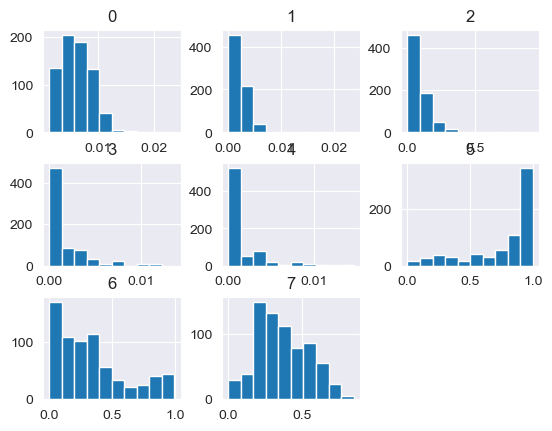

In [151]:
dataNormDf.hist()

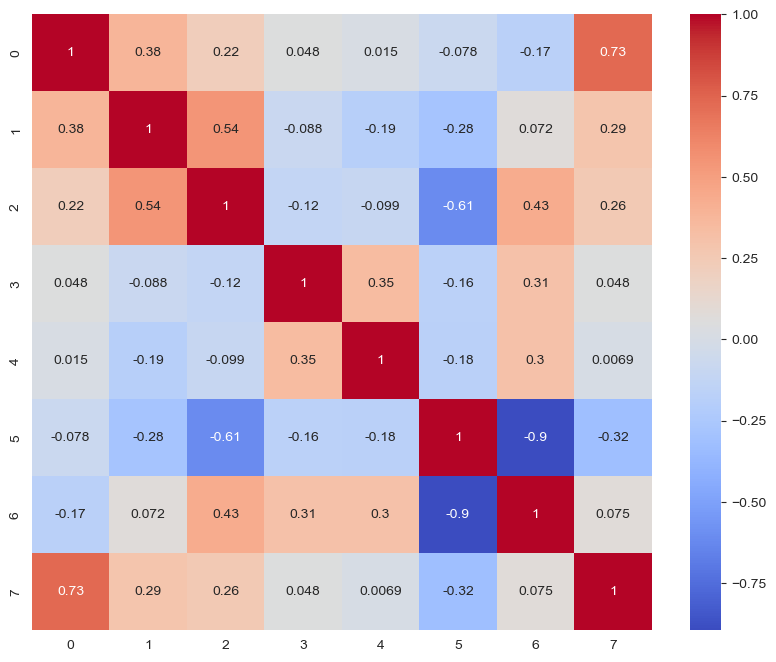

In [152]:
correlation_matrix = dataNormDf.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [153]:
#Pre-processing Standardization
#Testing if standardization works better on the data than normalization
scaler2 = StandardScaler().fit(X)
standardizedX = scaler2.transform(X)
dataStandDf = pd.DataFrame(standardizedX)

In [154]:
dataStandDf.describe()

,0,1,2,3,4,5,6,7
count,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02
mean,-5.473368e-17,7.712474e-17,2.338621e-16,-4.975789e-18,-7.214895e-17,5.224579e-17,-8.334447e-17,3.582568e-16
std,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00
min,-1.476364e+00,-1.317434e+00,-2.016979e+00,-5.517031e-01,-5.058951e-01,-1.649686e+00,-1.601206e+00,-3.431699e+00
25%,-1.476364e+00,-1.317434e+00,-6.595416e-01,-5.517031e-01,-5.058951e-01,-9.008487e-01,-9.822626e-01,4.060348e-01
50%,-2.825656e-01,7.590513e-01,-1.170488e-01,-5.517031e-01,-5.058951e-01,-2.167159e-02,-1.042258e-01,4.859876e-01
75%,9.112324e-01,7.590513e-01,5.718310e-01,5.245701e-01,6.668618e-01,9.607934e-01,7.414244e-01,4.859876e-01
max,9.112324e-01,7.590513e-01,3.465126e+00,4.829663e+00,6.530646e+00,1.694876e+00,1.954123e+00,4.859876e-01


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: >]], dtype=object)

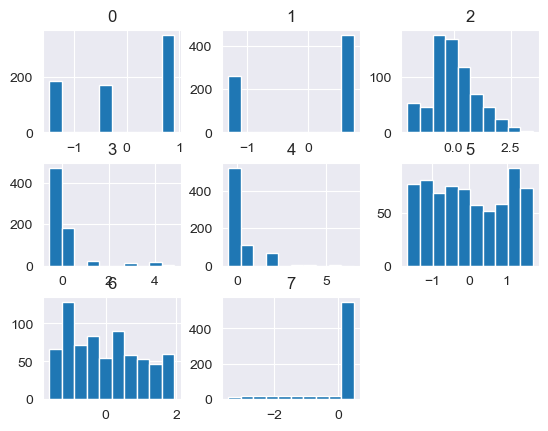

In [155]:
dataStandDf.hist()

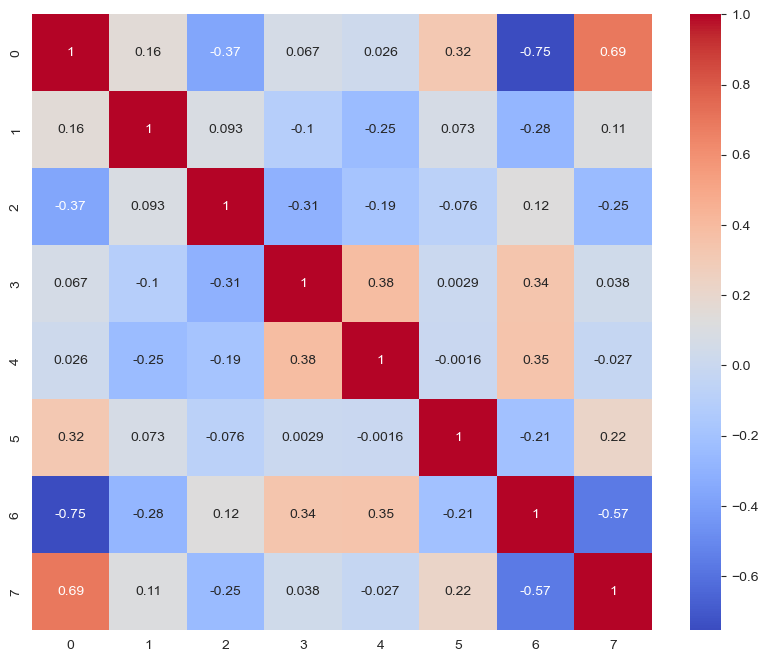

In [156]:
correlation_matrix = dataStandDf.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [214]:
X_train, X_test, y_train, y_test = train_test_split(normalizedX, Y, test_size=0.20)

In [274]:
linear_svc = LinearSVC(C=100, loss = 'hinge', random_state=1, max_iter=1000000)
linear_svc.fit(X_train, y_train)
y_linear_pred = linear_svc.predict(X_test)

# determine accuracy score for the linear svc method
print("Linear SVC Method: " + str(accuracy_score(y_test, y_linear_pred)))

Linear SVC Method: 0.7062937062937062


In [267]:
kernel_svc = SVC(kernel = 'rbf', degree = 2, C=1.0, random_state=1, max_iter = 1000000)
kernel_svc.fit(X_train, y_train)
y_kernel_pred = kernel_svc.predict(X_test)

# determine accuracy score for the linear svc method
print("Kernel SVC Method: " + str(accuracy_score(y_test, y_kernel_pred)))

Kernel SVC Method: 0.7132867132867133


In [271]:
random_forest_clf = RandomForestClassifier(random_state=42)
random_forest_clf.fit(X_train, y_train)
# y_prob_rf = random_forest_clf.predict_proba(X_test)
# y_pred_rf = random_forest_clf.predict(X_test)
# y_score_rf = y_prob_rf[:, 1]
# fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, y_score_rf)
y_rfclf_pred = random_forest_clf.predict(X_test)

# determine accuracy score for the linear svc method
print("Random Forest Classifier: " + str(accuracy_score(y_test, y_rfclf_pred)))

Random Forest Classifier: 0.8251748251748252


In [269]:
ada_clf = AdaBoostClassifier(n_estimators=200, algorithm= "SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_ada_pred = ada_clf.predict(X_test)

# determine accuracy score for the linear svc method
print("Ada Boosting Method: " + str(accuracy_score(y_test, y_ada_pred)))

Ada Boosting Method: 0.8181818181818182


In [272]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

# determine accuracy score for the bagging method
print("Bagging Method: " + str(accuracy_score(y_test, y_pred)))

Bagging Method: 0.8251748251748252


In [273]:
# now use a standard decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print("Standard Decision Tree Classifier: " + str(accuracy_score(y_test, y_pred_tree)))

Standard Decision Tree Classifier: 0.8111888111888111


In [283]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

clf.predict(X_test[:5, :])

print("MLP Classifier: " + str(clf.score(X_test, y_test)))

MLP Classifier: 0.7272727272727273


In [259]:
# use cross-validation. Although we are building a single classification model
# prepare models
models = []
models.append(('Linear SVC', linear_svc))
models.append(('Kernel SVC', kernel_svc))
models.append(('Random Forest', random_forest_clf))
models.append(('AdaBoost', ada_clf))
models.append(('Bagging', bag_clf))
models.append(('Standard Decision Tree', tree_clf))
models.append(('MLP Classifier', clf))

Linear SVC: 0.679362 (0.032380)
Kernel SVC: 0.666725 (0.031029)
Random Forest: 0.812324 (0.038050)
AdaBoost: 0.801154 (0.032188)
Bagging: 0.791334 (0.042517)
Standard Decision Tree: 0.789887 (0.036681)
MLP Classifier: 0.689124 (0.033618)


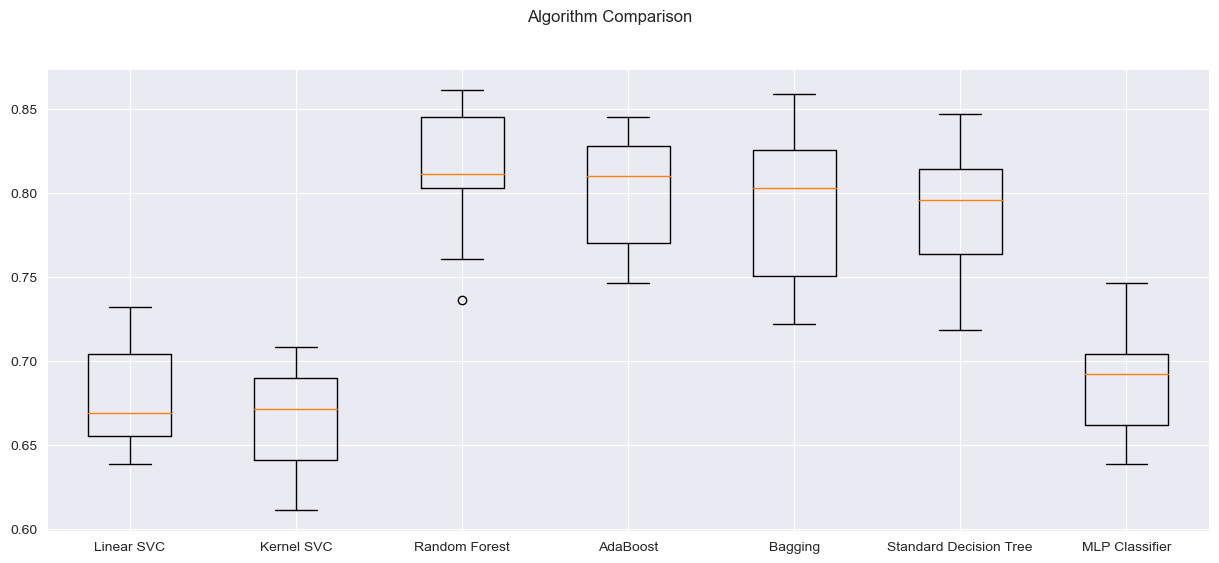

In [278]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle = True)
    cv_results = cross_val_score(model, normalizedX, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

## boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [310]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(classifier, X_test, y_test, title):
    """
    Plots the ROC curve for a given classifier.
    
    Parameters:
    - classifier: The trained classifier.
    - X_test: Test data.
    - y_test: True labels for the test data.
    - title: Title for the ROC curve plot.
    """
    # Compute probabilities
    y_probs = classifier.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

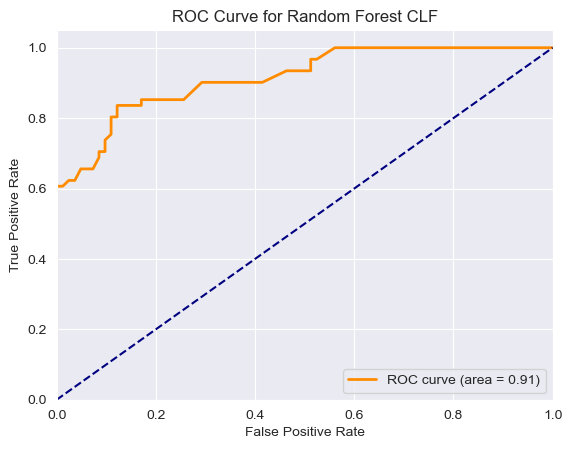

In [319]:
# Usage for Random Forest Classifier
plot_roc_curve(random_forest_clf, X_test, y_test, 'ROC Curve for Random Forest CLF')

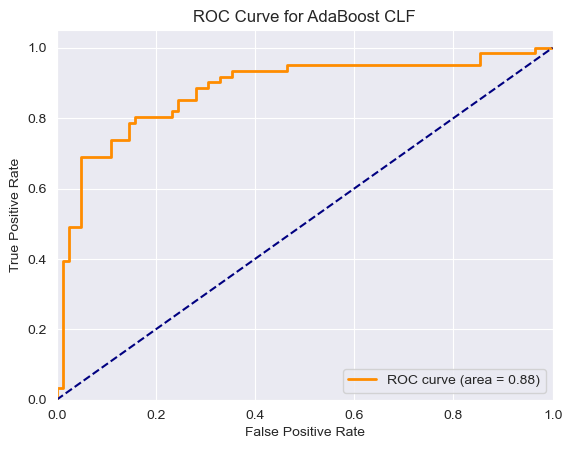

In [320]:
# For AdaBoost ClF
plot_roc_curve(ada_clf, X_test, y_test, 'ROC Curve for AdaBoost CLF')

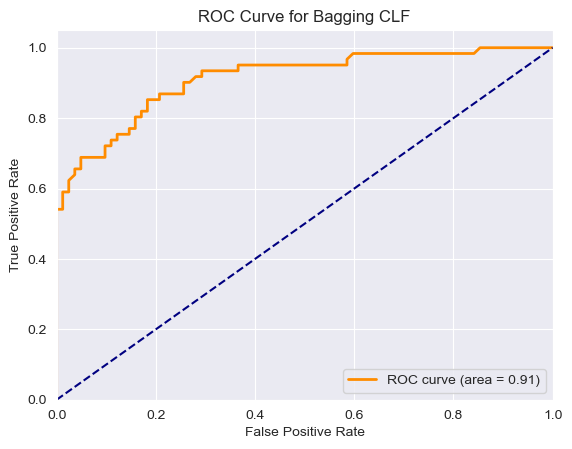

In [321]:
# For Bagging CLF
plot_roc_curve(bag_clf, X_test, y_test, 'ROC Curve for Bagging CLF')

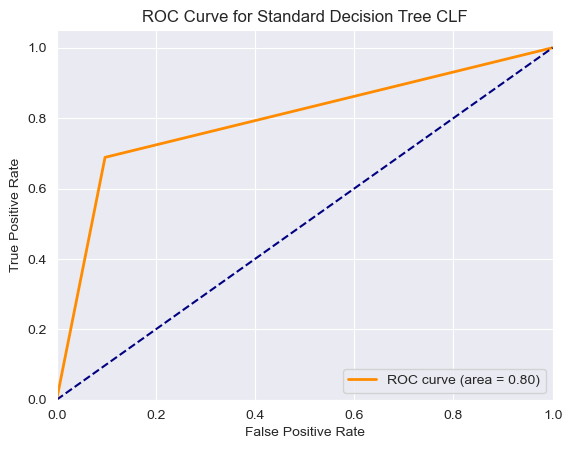

In [322]:
# For Standard Decision Tree CLF
plot_roc_curve(tree_clf, X_test, y_test, 'ROC Curve for Standard Decision Tree CLF')

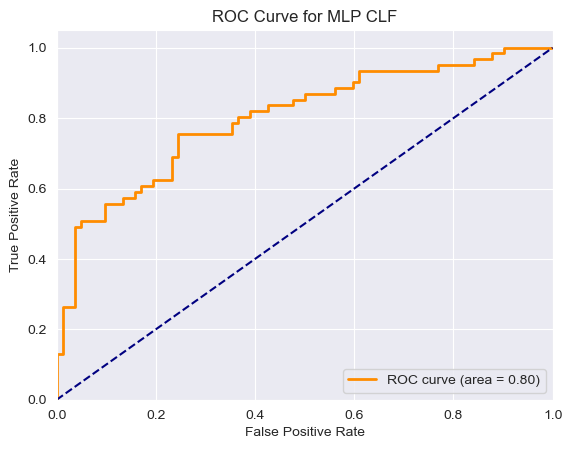

In [323]:
# For MLP Classifier
plot_roc_curve(clf, X_test, y_test, 'ROC Curve for MLP CLF')

In [422]:
# Load the new dataset
new_file = 'Titanic ML.csv'
data = read_csv(new_file)

In [423]:
def find_text_columns(data):
    """
    Identifies text columns in a DataFrame.
    Returns a list of column names that contain text.
    """
    # This is a simple heuristic; you might need a more sophisticated approach depending on your data
    text_columns = [col for col in data.columns if data[col].dtype == object]
    return text_columns


def convert_categorical_to_numeric(data, columns):
    """
    Converts specified categorical columns in a DataFrame to numerical values.
    Uses LabelEncoder to transform each unique category in the columns to a number.
    """
    le = LabelEncoder()
    for col in columns:
        data[col] = le.fit_transform(data[col])
    return data


# Columns to convert to numeric
columns_to_convert = ['Sex', 'Ticket', 'Fare', 'Cabin']

# Convert specified columns to numeric
data_numerical = convert_categorical_to_numeric(data, columns_to_convert)

In [424]:
# Display the first few rows of the DataFrame after conversion
print(data_numerical.head())

   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch  Ticket  Fare  Cabin Embarked  
0  34.5      0      0     152    24     76        Q  
1  47.0      1      0     221     5     76        S  
2  62.0      0      0      73    41     76        Q  
3  27.0      0      0     147    34     76        S  
4  22.0      1      1     138    46     76        S  


In [425]:
data_numerical

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,152,24,76,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,221,5,76,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,73,41,76,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,147,34,76,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,138,46,76,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,267,31,76,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,324,154,22,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,346,9,76,S
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,220,31,76,S


In [426]:
data = data_numerical
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,152,24,76,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,221,5,76,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,73,41,76,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,147,34,76,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,138,46,76,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,267,31,76,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,324,154,22,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,346,9,76,S
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,220,31,76,S


In [427]:
data.drop("Name", axis=1, inplace=True)
data.drop("Embarked", axis=1, inplace=True)
data = data.dropna()
data1 = data.select_dtypes(exclude=['object'])
data.drop("PassengerId", axis=1, inplace=True)
data1

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,892,3,1,34.5,0,0,152,24,76
1,893,3,0,47.0,1,0,221,5,76
2,894,2,1,62.0,0,0,73,41,76
3,895,3,1,27.0,0,0,147,34,76
4,896,3,0,22.0,1,1,138,46,76
...,...,...,...,...,...,...,...,...,...
409,1301,3,0,3.0,1,1,351,53,76
411,1303,1,0,37.0,1,0,48,151,41
412,1304,3,0,28.0,0,0,184,20,76
414,1306,1,0,39.0,0,0,324,154,22


In [428]:
random_forest_clf.predict(data)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [429]:
list(random_forest_clf.predict(data))

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [430]:
pd.DataFrame({'PassengerID':data1.pop('PassengerId') , 'Survived':random_forest_clf.predict(data) }).to_csv('passenger_prediction.csv',index=False)